In [19]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#load data
df = pd.read_csv("/Users/gangamahesh/Desktop/Fall25/cse 2600/CSE2600-Group-Project/data/Wildfire_Dataset.csv")

In [21]:
df.shape
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9509925 entries, 0 to 9509924
Data columns (total 19 columns):
 #   Column     Dtype  
---  ------     -----  
 0   latitude   float64
 1   longitude  float64
 2   datetime   object 
 3   Wildfire   object 
 4   pr         float64
 5   rmax       float64
 6   rmin       float64
 7   sph        float64
 8   srad       float64
 9   tmmn       float64
 10  tmmx       float64
 11  vs         float64
 12  bi         float64
 13  fm100      float64
 14  fm1000     float64
 15  erc        float64
 16  etr        float64
 17  pet        float64
 18  vpd        float64
dtypes: float64(17), object(2)
memory usage: 1.3+ GB


,latitude,longitude,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
count,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06
mean,3.914362e+01,-1.064347e+02,9.036891e+01,1.645754e+02,1.220707e+02,8.864304e+01,3.091587e+02,3.682137e+02,3.821415e+02,9.239142e+01,1.221668e+02,1.013892e+02,1.030986e+02,1.320922e+02,9.425599e+01,9.275527e+01,8.976546e+01
std,5.267332e+00,1.456924e+01,1.701836e+03,1.698086e+03,1.700272e+03,1.701914e+03,1.692717e+03,1.687376e+03,1.686659e+03,1.701719e+03,1.700336e+03,1.701257e+03,1.701169e+03,1.699822e+03,1.701624e+03,1.701701e+03,1.701856e+03
min,2.526027e+01,-1.244370e+02,0.000000e+00,5.000000e+00,1.000000e+00,1.300000e-04,0.000000e+00,2.309000e+02,2.419000e+02,3.000000e-01,0.000000e+00,1.100000e+00,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.468867e+01,-1.183439e+02,0.000000e+00,6.180000e+01,1.930000e+01,3.600000e-03,1.472000e+02,2.749000e+02,2.879000e+02,2.600000e+00,1.900000e+01,8.700000e+00,1.030000e+01,2.500000e+01,3.200000e+00,2.300000e+00,4.700000e-01
50%,3.853161e+01,-1.109258e+02,0.000000e+00,8.000000e+01,3.080000e+01,5.520000e-03,2.277000e+02,2.811000e+02,2.955000e+02,3.400000e+00,3.400000e+01,1.290000e+01,1.480000e+01,3.900000e+01,5.400000e+00,4.100000e+00,9.200000e-01
75%,4.367004e+01,-9.541990e+01,0.000000e+00,9.520000e+01,4.550000e+01,7.790000e-03,3.001000e+02,2.864000e+02,3.019000e+02,4.600000e+00,5.000000e+01,1.660000e+01,1.840000e+01,6.100000e+01,7.700000e+00,5.800000e+00,1.580000e+00
max,4.899873e+01,-6.701250e+01,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04


Helped me understand the dataset’s **size, structure, and basic statistics** before doing any analysis

* The dataset has **9,509,925 rows** and **19 columns**
* Most columns are **numeric (float64)**, except for `datetime` and `Wildfire` (object type)
* There are **no missing values**, which is good
* The `describe()` output shows **very large standard deviations**, **some extreme outliers** 
* This tells us we’ll need to **clean or filter** those outliers before doing correlation or modeling

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'])

Converted the `datetime` column from an **object (string)** type to a **datetime** data type using `pd.to_datetime()`.

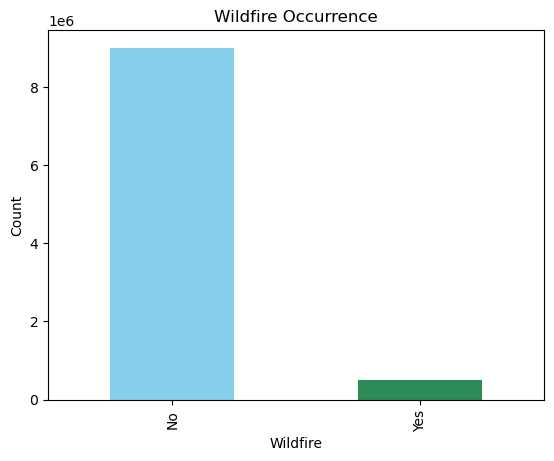

In [35]:
df['Wildfire'].value_counts()
df['Wildfire'].value_counts(normalize=True)

# Class distribution
df['Wildfire'].value_counts().plot(kind='bar', color=['skyblue', 'seagreen'])
plt.title('Wildfire Occurrence')
plt.xlabel('Wildfire')
plt.ylabel('Count')
plt.show()

Checked the distribution of the target variable `Wildfire` to understand the balance between positive (`Yes`) and negative (`No`) samples
  1. Counted the number of occurrences of each class using `value_counts()`.
  2. Calculated the relative proportion with `value_counts(normalize=True)`.
  3. Shows the distribution with a bar plot.
* The plot shows a strong imbalance: the `No` class has a much higher count (over 8) compared to the `Yes` class (less than 2). This indicates the dataset is heavily skewed toward non-fire events, which we will need to consider when modeling

In [ ]:
#Missing values
df.isna().sum()

latitude     0
longitude    0
datetime     0
Wildfire     0
pr           0
rmax         0
rmin         0
sph          0
srad         0
tmmn         0
tmmx         0
vs           0
bi           0
fm100        0
fm1000       0
erc          0
etr          0
pet          0
vpd          0
dtype: int64

Checked for missing values in the dataset
  1. Used `df.isna().sum()` to count the number of missing values in each column.

  * No missing values were found in any of the 19 columns (`latitude`, `longitude`, `datetime`, `Wildfire`, and the 15 GRIDMET variables).

In [25]:
# Convert Wildfire to binary for correlation
df['Wildfire_binary'] = df['Wildfire'].map({'No': 0, 'Yes': 1})
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()['Wildfire_binary'].sort_values(ascending=False)
print(corr)

Wildfire_binary    1.000000
erc               -0.011491
bi                -0.011754
tmmx              -0.012093
tmmn              -0.012130
etr               -0.012253
pet               -0.012271
vpd               -0.012276
sph               -0.012296
vs                -0.012313
srad              -0.012319
pr                -0.012321
fm100             -0.012422
fm1000            -0.012503
rmin              -0.012672
rmax              -0.012689
latitude          -0.030539
longitude         -0.051478
Name: Wildfire_binary, dtype: float64


Understood which numerical variables are most associated with wildfire events
  1. Created a new column `Wildfire_binary` mapping `No → 0` and `Yes → 1`
  2. Selected all numeric columns in the dataset
  3. Calculated Pearson correlation between each numeric column and `Wildfire_binary`
  4. Sorted the correlations in descending order to see which features are positively or negatively correlated

  * The correlation values are all very close to 0, showing weak linear relationships
  * The strongest correlations (still very small) are: `longitude (-0.051)`, `latitude (-0.031)`, and `rmax (-0.0127)`

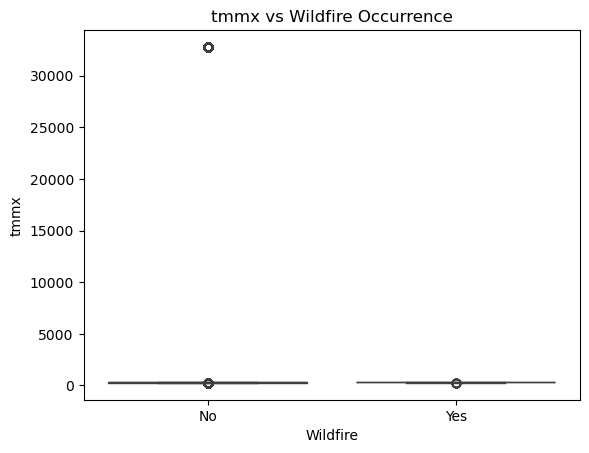

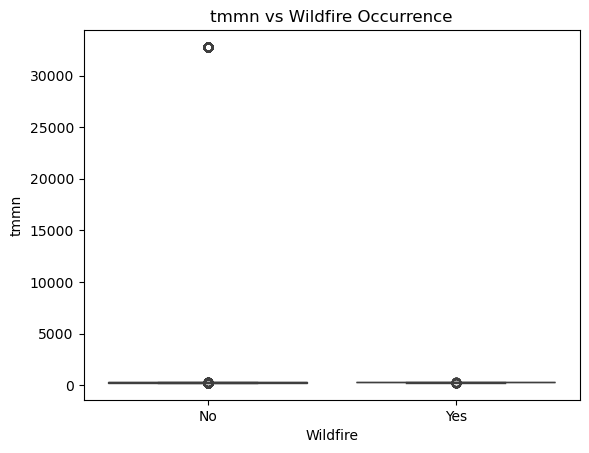

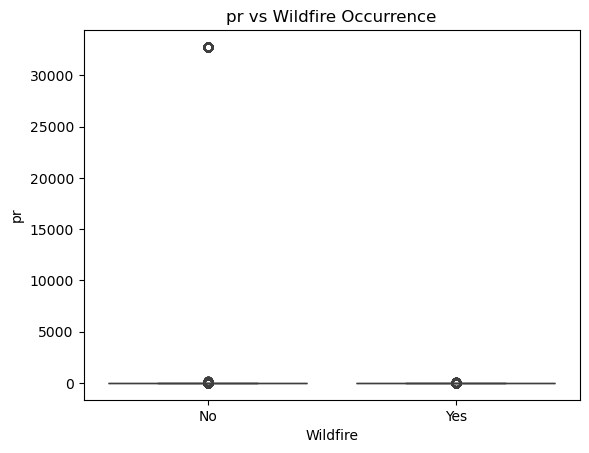

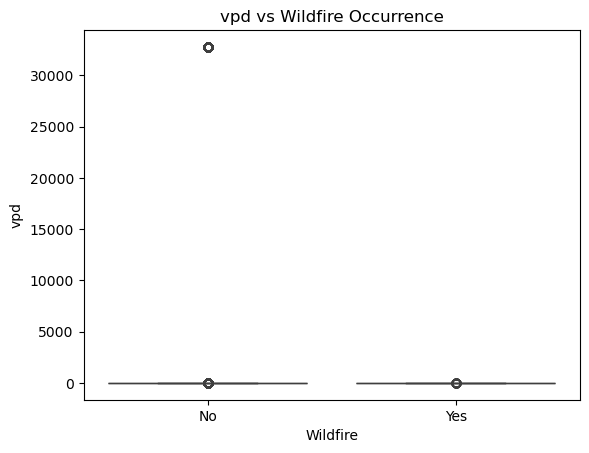

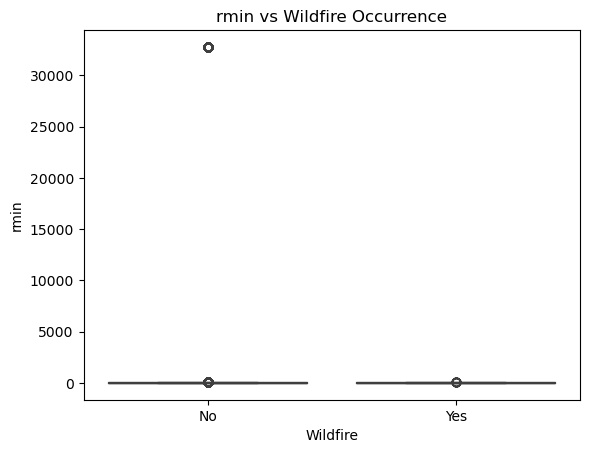

In [45]:
# Compare variables for Wildfire vs Non-Wildfire
features = ['tmmx', 'tmmn', 'pr', 'vpd', 'rmin']
for f in features:
    sns.boxplot(x='Wildfire', y=f, data=df.sample(50000))
    plt.title(f'{f} vs Wildfire Occurrence')
    plt.show()

Compared how certain environmental factors differ between wildfire (`Yes`) and non-wildfire (`No`) days

  * Took a random sample of 50,000 rows for quicker plotting.
  * Used a `boxplot` to show the distribution of each variable for the two wildfire classes.


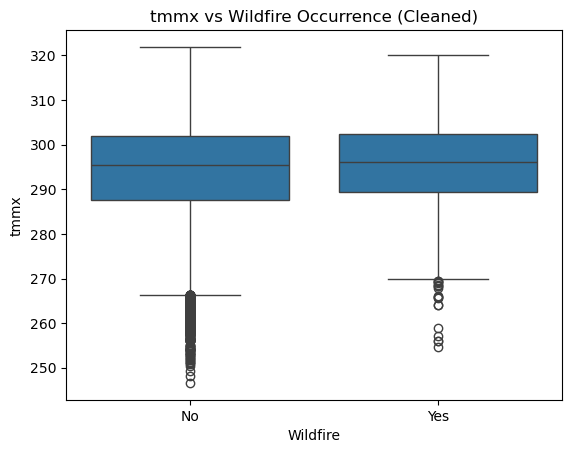

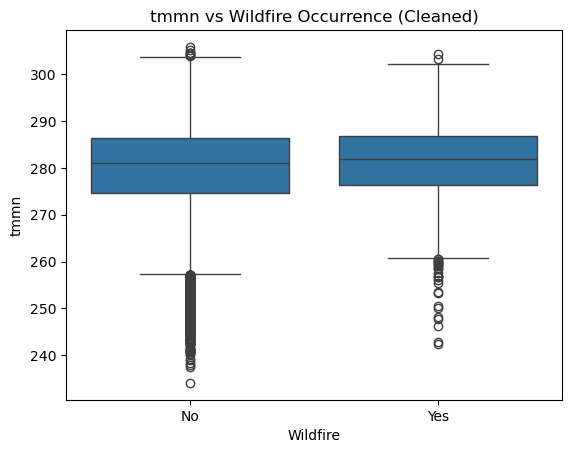

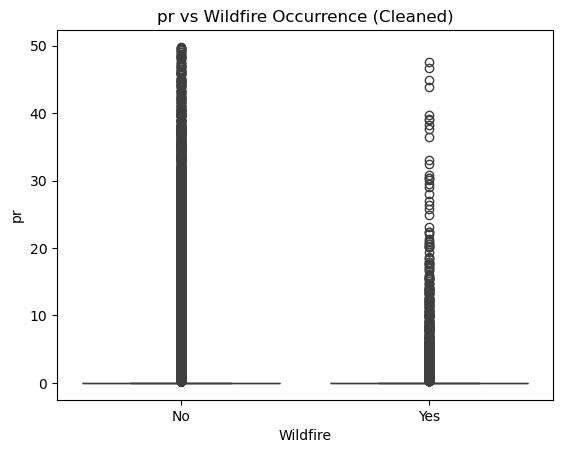

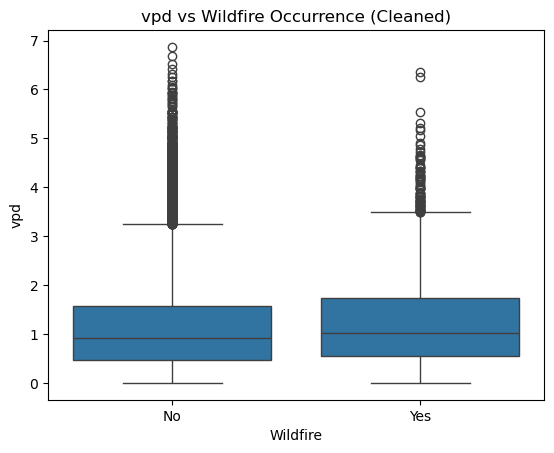

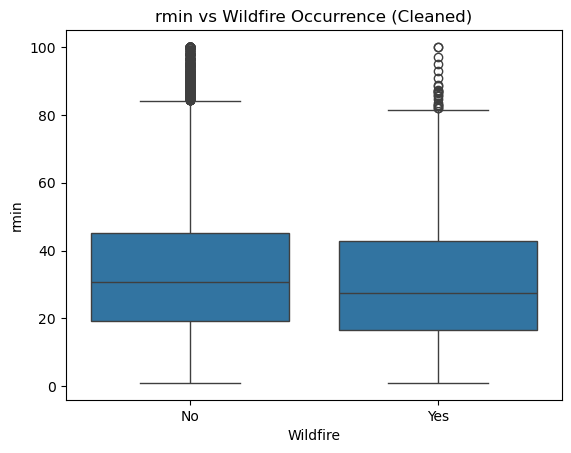

In [44]:
df_filtered = df[
    (df['tmmx'] < 1000) &
    (df['tmmn'] < 1000) &
    (df['pr'] < 50) &
    (df['vpd'] < 10000) &
    (df['rmin'] <= 100)
]

df_sample = df_filtered.sample(50000, random_state=42)

features = ['tmmx', 'tmmn', 'pr', 'vpd', 'rmin']

for f in features:
    sns.boxplot(x='Wildfire', y=f, data=df_sample)
    plt.title(f'{f} vs Wildfire Occurrence (Cleaned)')
    plt.show()


The earlier boxplots showed that most features had wide ranges, due to extreme outliers. 
  1. Filtered out outliers using reasonable thresholds:

     * `tmmx`, `tmmn` < 1000
     * `pr` < 50
     * `vpd` < 10000
     * `rmin` ≤ 100
  2. Took a random sample of 50,000 cleaned rows (`df_sample`) for visualization.
  3. Replotted boxplots for key features (`tmmx`, `tmmn`, `pr`, `vpd`, `rmin`) against wildfire occurrence.

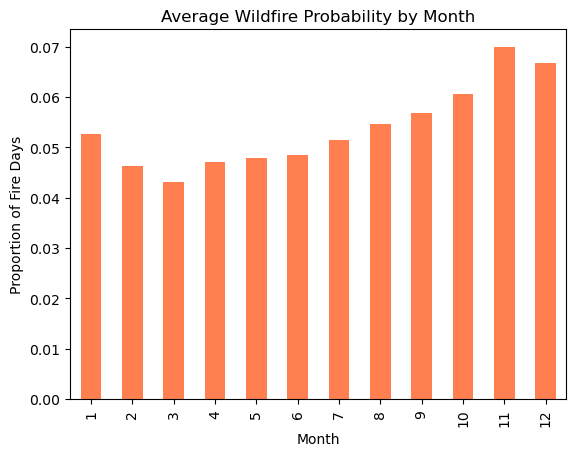

In [37]:
df['month'] = df['datetime'].dt.month
df.groupby('month')['Wildfire_binary'].mean().plot(kind='bar', color='coral')
plt.title('Average Wildfire Probability by Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Fire Days')
plt.show()

Explored whether wildfires show seasonal patterns
  1. Extracted the month from the `datetime` column using `dt.month`
  2. Calculated the mean of `Wildfire_binary` (where `1` = fire, `0` = no fire) for each month — this gives the average probability of a wildfire occurring
  3. Visualized the results with a bar chart